<a href="https://colab.research.google.com/github/saiashishanshuman/Fault-Classification/blob/main/Fault_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [208]:
#Loading Dataset
data = pd.read_csv("/content/drive/MyDrive/classData.csv")
data.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


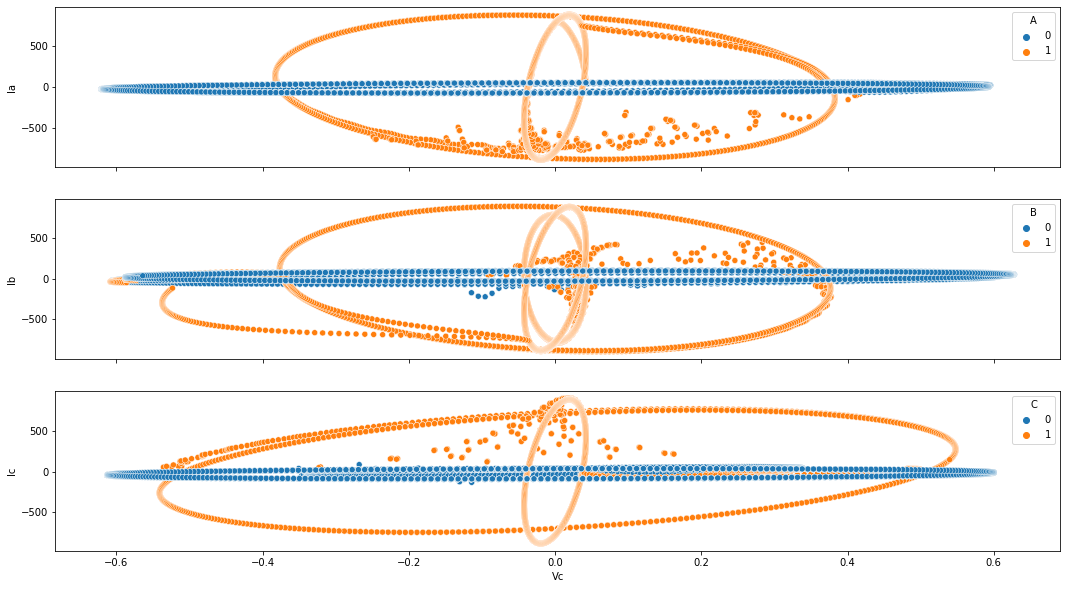

In [209]:
figure, axes = plt.subplots(3,1, sharex = True, figsize = (18, 10))
sns.scatterplot(data = data, x = 'Va', y = 'Ia', hue = 'A', ax=axes[0])
sns.scatterplot(data = data, x = 'Vb', y = 'Ib', hue = 'B', ax=axes[1])
sns.scatterplot(data = data, x = 'Vc', y = 'Ic', hue = 'C', ax=axes[2])


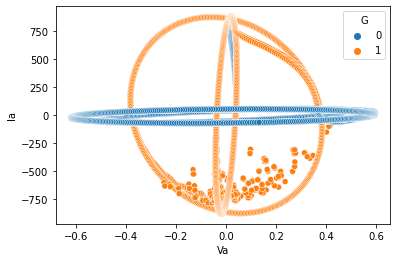

In [210]:
sns.scatterplot(x = 'Va', y='Ia', hue = 'G', data= data)

In [211]:
count = 0
for i in range(0, 7861):
  if data['G'][i] != data['A'][i]:
    count += 1

print(count)


1096


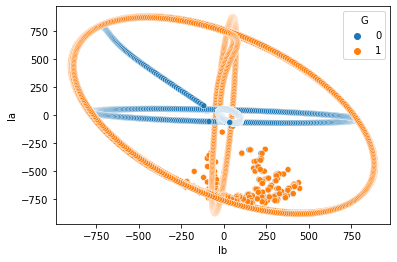

In [212]:
sns.scatterplot(x = 'Ib', y = 'Ia', hue = 'G', data = data)

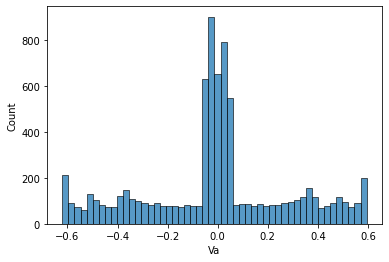

In [213]:
#Histograms
sns.histplot(data = data, x = 'Va')

In [214]:
X = data.drop(['G', 'C', 'B', 'A'], axis = 1)
ya = data['A']
X

,Ia,Ib,Ic,Va,Vb,Vc
0,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983
...,...,...,...,...,...,...
7856,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
7857,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
7858,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
7859,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


In [216]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [217]:
#Using Machine Learning on G
X_train, X_test, y_train, y_test = train_test_split(X, ya, test_size = 0.20, random_state = 42)

In [218]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state = 42)
clf = clf.fit(X_train, y_train)

In [219]:
pred = clf.predict(X_test)
confusion_matrix(y_test, pred), accuracy_score(y_test, pred)

(array([[683,   0],
        [  0, 890]]), 1.0)

In [220]:
#For B
yb = data['B']

In [221]:
from sklearn.metrics import confusion_matrix, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, yb, test_size = 0.20, random_state = 42)

In [222]:
clfb = tree.DecisionTreeClassifier(random_state = 42)
clfb = clfb.fit(X_train, y_train)
pred = clfb.predict(X_test)
confusion_matrix(y_test, pred), accuracy_score(y_test, pred)

(array([[723,   1],
        [  5, 844]]), 0.996185632549269)

In [223]:
#For C
yc = data['C']
X_train, X_test, y_train, y_test = train_test_split(X, yc, test_size = 0.20, random_state = 42)

clfc = tree.DecisionTreeClassifier(random_state = 42)
clfc = clfc.fit(X_train, y_train)
pred = clfc.predict(X_test)
confusion_matrix(y_test, pred), accuracy_score(y_test, pred)

(array([[961,   1],
        [  1, 610]]), 0.9987285441830897)

In [224]:
X = data.drop('G', axis = 1)
yg = data['G']

X_train, X_test, y_train, y_test = train_test_split(X, yg, test_size = 0.20, random_state = 42)

clfg = tree.DecisionTreeClassifier(random_state = 42)
clfg = clfg.fit(X_train, y_train)
pred = clfg.predict(X_test)
confusion_matrix(y_test, pred), accuracy_score(y_test, pred)

(array([[810,  72],
        [ 78, 613]]), 0.9046408137317228)

In [225]:
ex = np.array(data.iloc[2, 4:10]).reshape(1,-1)

##Program to predict the fault

In [226]:
nex = [[-151.2918124, -9.677451563, 85.80016226, 0.400749853, -0.132934945, -0.267814907]]
c = np.insert(nex, 0, clf.predict(ex), axis = 1)
b = np.insert(c, 0, clfb.predict(ex), axis = 1)
a = np.insert(b, 0, clfc.predict(ex), axis = 1)
arr = list(map(int, [clfg.predict(a), clfc.predict(ex),clfb.predict(ex), clf.predict(ex)]))
arr

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with

[1, 0, 0, 1]

In [227]:
print(f"The fault is {arr}")

The fault is [1, 0, 0, 1]
